In [191]:
import cv2
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
i = 14

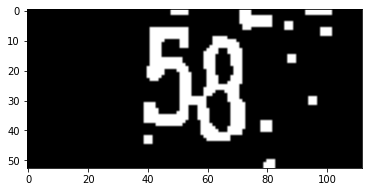

In [192]:
img = cv2.imread(f'data/train/{i}.png')
# bfilter= cv2.bilateralFilter(img,11,17,17)
# gray = cv2.cvtColor(bfilter,cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray,30,150)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, 1, 1, 11, 2)
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# closing the image
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(closing,cmap='gray')

In [193]:
digitStruct = pd.read_json('data/train/digitStruct.json')

digitStruct.set_index('filename', inplace=True)

digitStruct.head()

,boxes
filename,
1.png,"[{'height': 219.0, 'label': 1.0, 'left': 246.0..."
2.png,"[{'height': 32.0, 'label': 2.0, 'left': 77.0, ..."
3.png,"[{'height': 15.0, 'label': 2.0, 'left': 17.0, ..."
4.png,"[{'height': 34.0, 'label': 9.0, 'left': 57.0, ..."
5.png,"[{'height': 46.0, 'label': 3.0, 'left': 52.0, ..."


In [194]:
def get_gt_contours(i):
    gt_contours = []
    boxes = digitStruct.loc[f'{str(i)}.png', 'boxes']
    for box in boxes:
        x = box['left']
        y = box['top']
        w = box['width']
        h = box['height']
        gt_contours.append([x, y, x+w, y+h])
    return gt_contours

In [195]:
gt_contours = get_gt_contours(i)
print(len(gt_contours))
gt_contours

2


[[35.0, 2.0, 56.0, 44.0], [55.0, 2.0, 78.0, 44.0]]

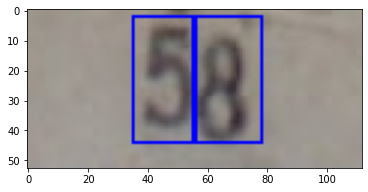

In [196]:
gt_boxes = img.copy()
for contour in gt_contours:
    contour = list(map(int, contour)) # To cast all point values to integers (loaded from json file as float)
    [x1, y1, x2, y2] = contour
    cv2.rectangle(gt_boxes, (x1,y1), (x2,y2), (255,0,0), 1)
plt.imshow(cv2.cvtColor(gt_boxes, cv2.COLOR_BGR2RGB))

In [197]:
first_box = gt_contours[0]
first_box = [int(i) for i in first_box]
first_box

[35, 2, 56, 44]

In [198]:
# first_digit = edges[first_box[1]:first_box[3],first_box[0]:first_box[2]]
first_digit = closing[first_box[1]:first_box[3],first_box[0]:first_box[2]]


(50, 50)
uint8


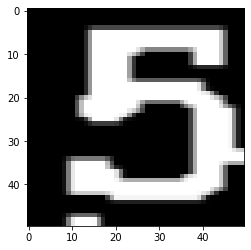

In [199]:
first_digit = cv2.resize(first_digit,(50,50))
plt.imshow(first_digit,cmap='gray')
print(first_digit.shape)
print(first_digit.dtype)

In [200]:
templates = []
for row in range(1,11):
    for col in range(1,11):
        template = cv2.imread(f"Templates/numbers/PineTools.com_2023-05-08_07h18m28s/PineTools.com_files/row-{row}-column-{col}.png")
#         bfilter= cv2.bilateralFilter(template,11,17,17)
        gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
#         edges = cv2.Canny(gray,30,150)
        ret, img_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
        
        templates.append(img_thresh)

(45, 42)
uint8


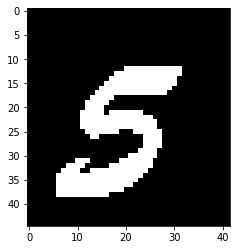

In [201]:
plt.imshow(templates[35],cmap='gray')
print(templates[35].shape)
print(templates[35].dtype)


In [202]:
best_match_score = 0
best_match_index = 0
for i, template in enumerate(templates):
    match_score = cv2.matchTemplate(first_digit, template, cv2.TM_CCOEFF_NORMED)[0][0]
    if match_score > best_match_score:
        best_match_score = match_score
        best_match_index = i
print('Recognized digit:', best_match_index)
print('Best Score:', best_match_score)

Recognized digit: 15
Best Score: 0.29083353


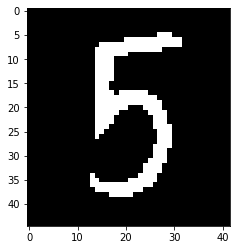

In [203]:
plt.imshow(templates[best_match_index],cmap='gray')